<h1 style="text-align: center;">Churn Prediction for Bank Customer (Artificial Neural Networks)<h1>

## 1. Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his/her account) or s/he continues to be a customer.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## 3. Load Data

In [2]:
df = pd.read_csv('Churn_Modeling.csv')

## 4. Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.000,83807.860,159660.800,0.000,125510.820
NumOfProducts,1,1,3,2,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.isnull().any().any()

False

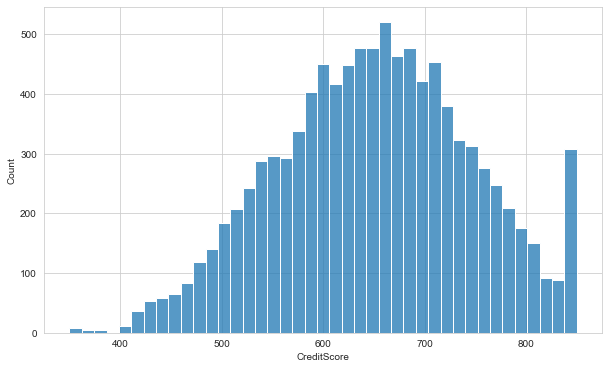

In [8]:
sns.histplot(df.CreditScore);

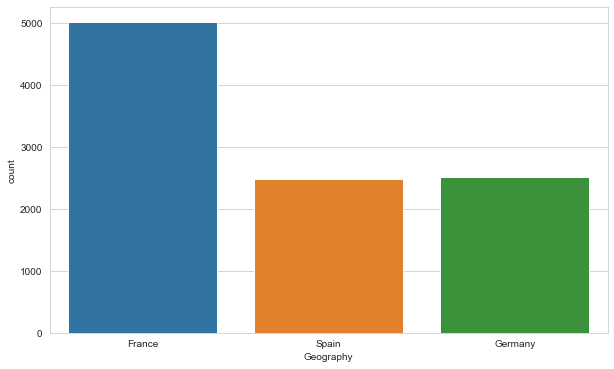

In [9]:
sns.countplot(df.Geography);

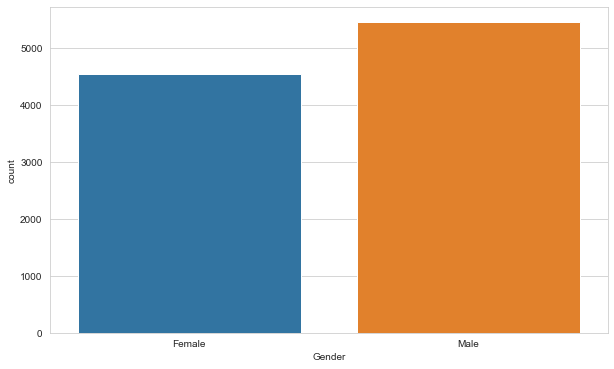

In [10]:
sns.countplot(df.Gender);

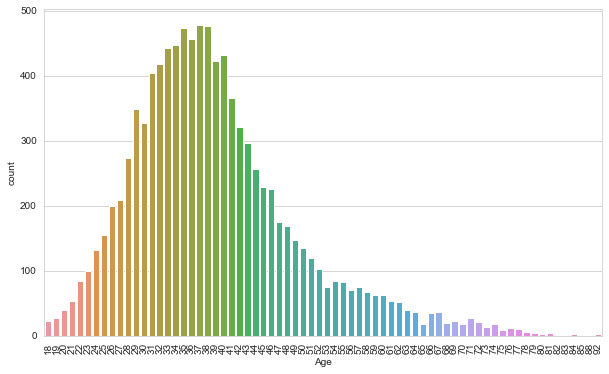

In [11]:
sns.countplot(df.Age)
plt.xticks(rotation=90);

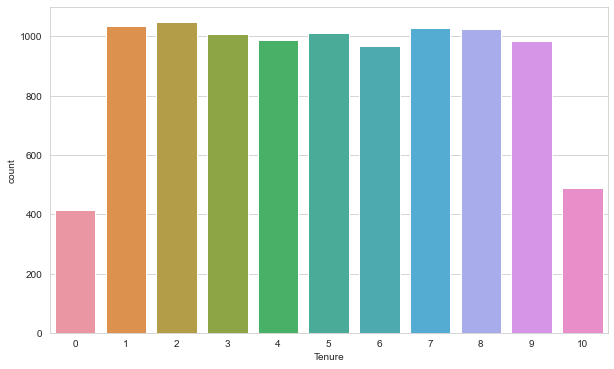

In [12]:
sns.countplot(df.Tenure);

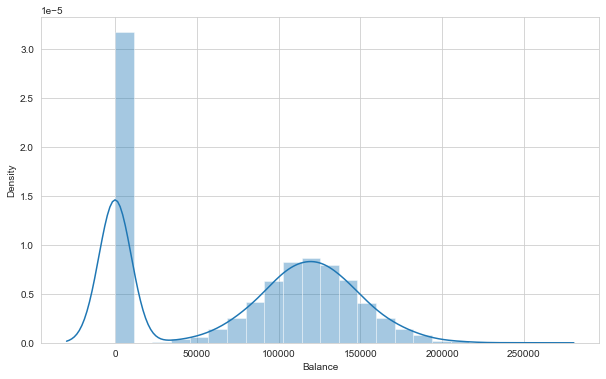

In [13]:
sns.distplot(df.Balance);

In [14]:
len(df[df.Balance == 0])

3617

In [15]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

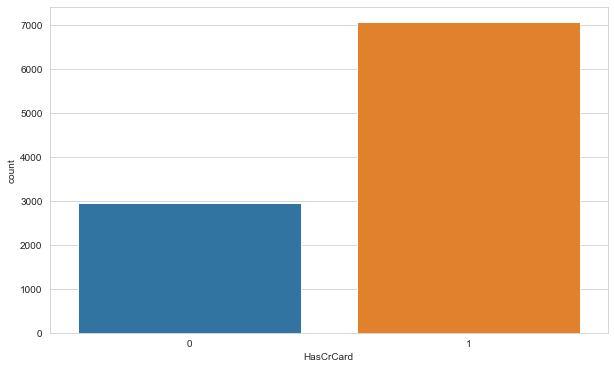

In [16]:
sns.countplot(df.HasCrCard);

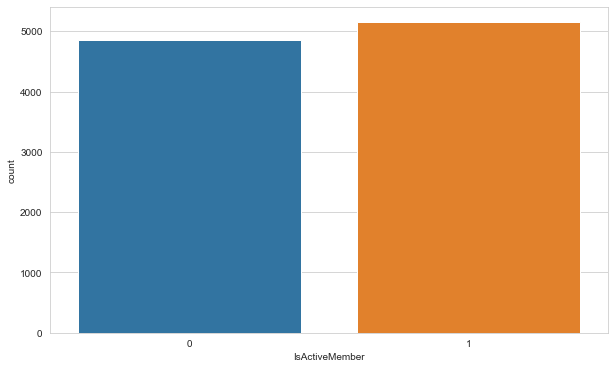

In [17]:
sns.countplot(df.IsActiveMember);

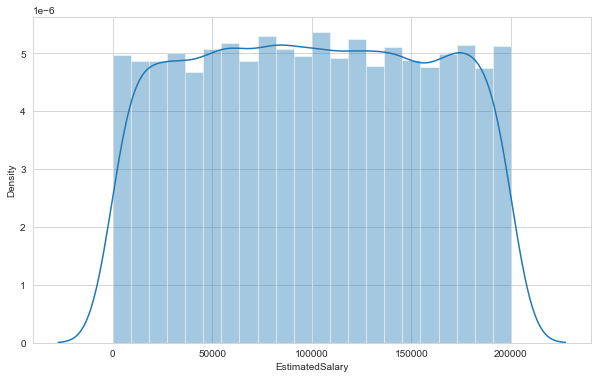

In [18]:
sns.distplot(df.EstimatedSalary);

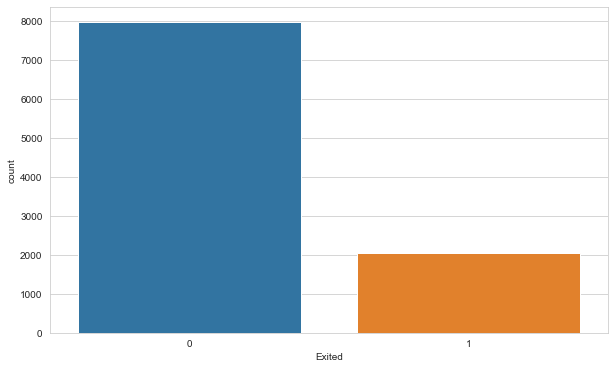

In [19]:
sns.countplot(df.Exited);

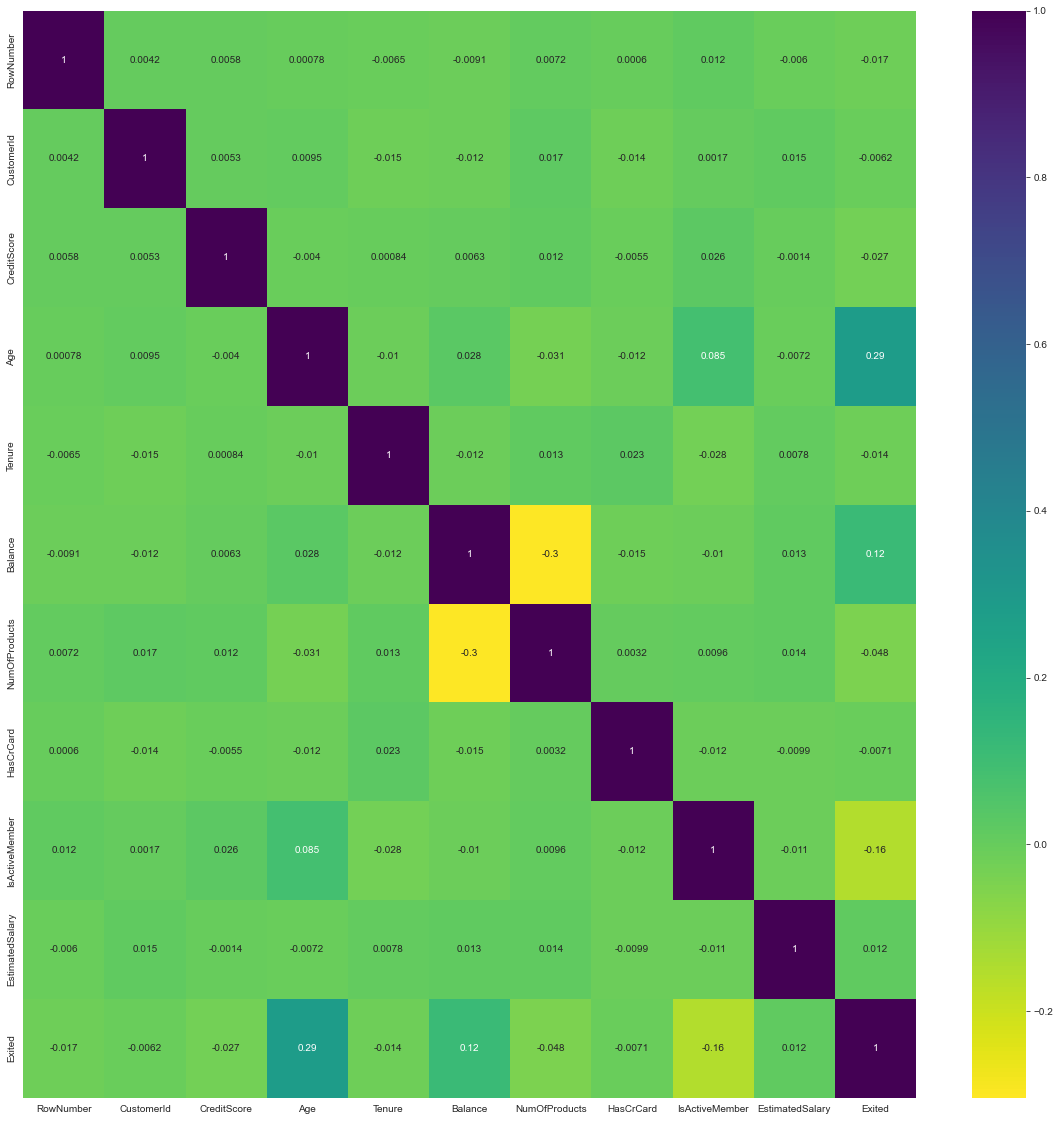

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='viridis_r');

In [3]:
df_new = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

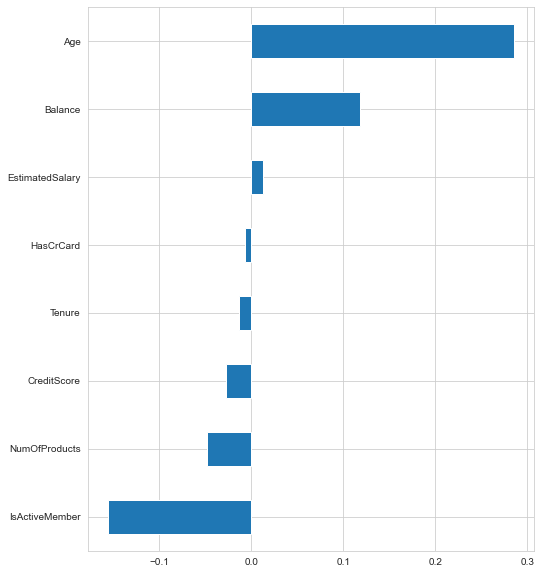

In [4]:
plt.figure(figsize = (8,10))
df_new.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [5]:
geo = pd.get_dummies(df_new['Geography'], prefix='geo')
gender = pd.get_dummies(df_new['Gender'])
df_new2 = pd.concat([df_new, geo, gender], axis = 1)

In [6]:
df_new2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain,Female,Male
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [7]:
df_final = df_new2.drop(['Geography', 'Gender'], axis = 1)

In [8]:
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain,Female,Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   geo_France       10000 non-null  uint8  
 10  geo_Germany      10000 non-null  uint8  
 11  geo_Spain        10000 non-null  uint8  
 12  Female           10000 non-null  uint8  
 13  Male             10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


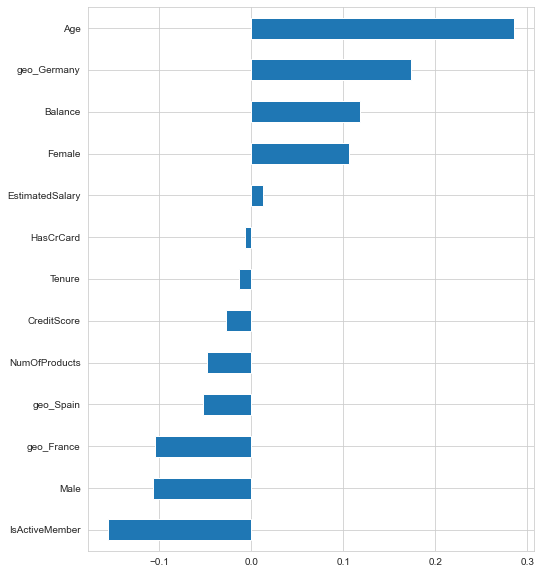

In [9]:
plt.figure(figsize = (8,10))
df_final.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

## 5. Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
X = df_final.drop('Exited', axis=1)
y = df_final['Exited'].values

In [12]:
seed = 42

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5.1. Import related libraries

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### 5.2. Creating Model

### 5.2.1. Without class_weight

In [17]:
from tensorflow.keras.optimizers import Adam

In [49]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(optimizer = Adam(lr = 0.003), loss = "binary_crossentropy", metrics = ["accuracy"])

# buraya Recall da yazilabilir

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, 
          verbose=1, callbacks = [tb_callback])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                280       
                                                                 
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dense_10 (Dense)            (None, 10)                160       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 766
Trainable params: 766
Non-trainable params: 0
_________________________________________________________________


In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.476,0.800,0.420,0.826
1,0.428,0.816,0.405,0.827
2,0.390,0.835,0.335,0.868
3,0.372,0.844,0.318,0.877
4,0.363,0.845,0.311,0.874


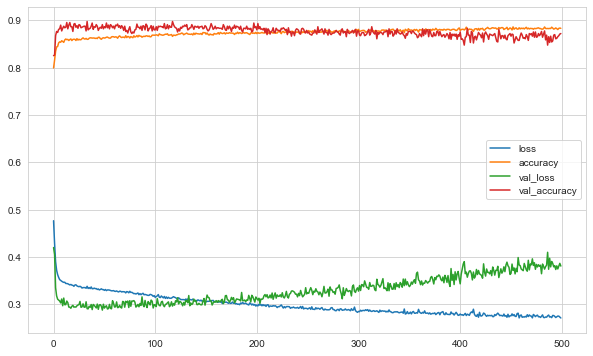

In [53]:
loss_df.plot();

In [54]:
model.evaluate(X_test, y_test, verbose=0)

[0.4323722720146179, 0.8489999771118164]

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4323722720146179
accuracy :  0.8489999771118164


In [56]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[762  34]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.43      0.54       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



### 5.2.2. Without class_weight (with Early stop)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr = 0.003), loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [60]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, 
          verbose = 1, callbacks = [early_stop])

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.4765 - accuracy: 0.7995 - val_loss: 0.4199 - val_accuracy: 0.8256
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8159 - val_loss: 0.4049 - val_accuracy: 0.8267
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8347 - val_loss: 0.3347 - val_accuracy: 0.8678
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3719 - accuracy: 0.8438 - val_loss: 0.3176 - val_accuracy: 0.8767
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3626 - accuracy: 0.8449 - val_loss: 0.3107 - val_accuracy: 0.8744
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8525 - val_loss: 0.3086 - val_accuracy: 0.8811
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3520 - accuracy: 0.8547 - val_loss: 0.3068 - val_accuracy: 0.8822

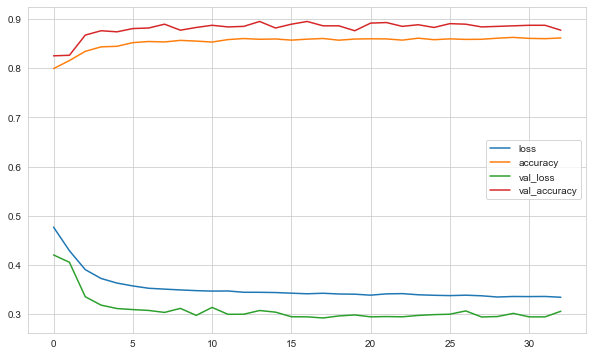

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [62]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3536248505115509
accuracy :  0.843999981880188


In [63]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[774  22]
 [134  70]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       796
           1       0.76      0.34      0.47       204

    accuracy                           0.84      1000
   macro avg       0.81      0.66      0.69      1000
weighted avg       0.83      0.84      0.82      1000



### 5.2.3. Without class_weight (without Early stop - with limited epochs)

In [65]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr = 0.003), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 150, 
          verbose = 1)

#### Evaluate

<AxesSubplot:>

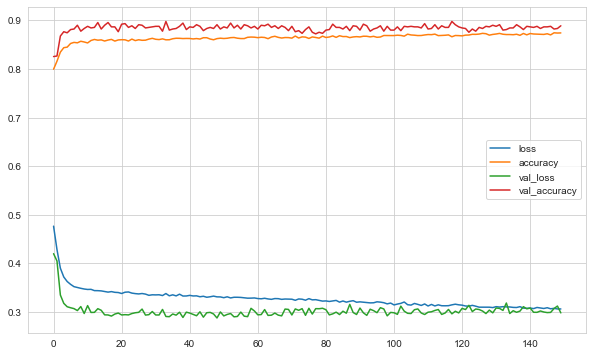

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [68]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3597605228424072
accuracy :  0.8550000190734863


In [69]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[767  29]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.43      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



### 5.2.4. With class_weight

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [19]:
from sklearn.utils import class_weight

In [20]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weight_dict = dict(enumerate(class_weights))

In [81]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr = 0.003), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, 
          class_weight=class_weight_dict, verbose = 1)

<AxesSubplot:>

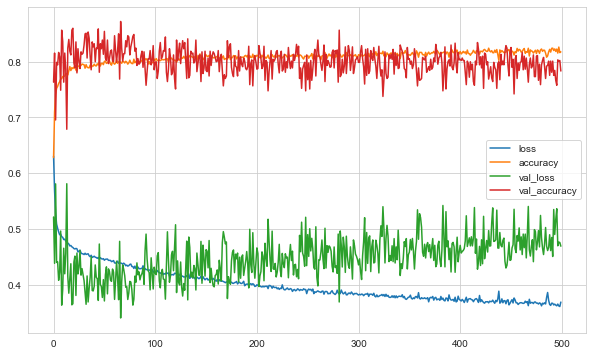

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [84]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5564883351325989
accuracy :  0.765999972820282


In [85]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[619 177]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.45      0.72      0.56       204

    accuracy                           0.77      1000
   macro avg       0.68      0.75      0.70      1000
weighted avg       0.82      0.77      0.78      1000



### 5.2.5. With class_weight (2nd trial)

In [124]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr = 0.002), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 150, 
          class_weight=class_weight_dict, verbose = 1)

#### Evaluate

<AxesSubplot:>

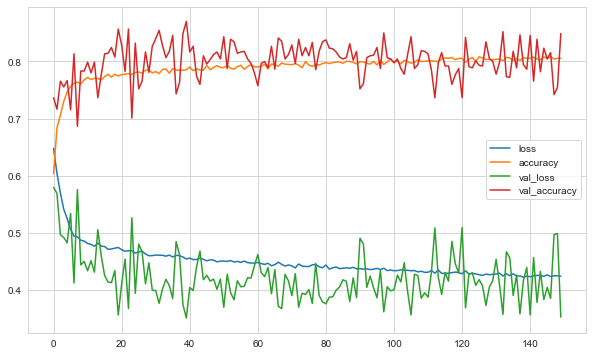

In [126]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [127]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3958185017108917
accuracy :  0.8209999799728394


In [128]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[684 112]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       796
           1       0.55      0.67      0.60       204

    accuracy                           0.82      1000
   macro avg       0.73      0.77      0.74      1000
weighted avg       0.84      0.82      0.83      1000



## 6. GridSearchCV

In [21]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [22]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [29]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [30]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 0, 
                           patience = 20)

In [ ]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, 
                                   epochs = 150)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.002],
              'class_weight': [None, class_weight_dict]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

In [148]:
grid_model.best_score_

0.8595555555555556

In [149]:
grid_model.best_params_

{'batch_size': 32,
 'class_weight': None,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.nadam.Nadam}

In [151]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", 
                                                    "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.855,0.009,9,"{'batch_size': 32, 'class_weight': None, 'lear..."
1,0.853,0.010,12,"{'batch_size': 32, 'class_weight': None, 'lear..."
2,0.796,0.008,13,"{'batch_size': 32, 'class_weight': None, 'lear..."
3,0.860,0.006,1,"{'batch_size': 32, 'class_weight': None, 'lear..."
4,0.855,0.009,10,"{'batch_size': 32, 'class_weight': None, 'lear..."
5,0.858,0.005,4,"{'batch_size': 32, 'class_weight': None, 'lear..."
6,0.796,0.009,14,"{'batch_size': 32, 'class_weight': None, 'lear..."
7,0.857,0.007,6,"{'batch_size': 32, 'class_weight': None, 'lear..."
8,0.788,0.016,17,"{'batch_size': 32, 'class_weight': {0: 0.62787..."
9,0.777,0.017,21,"{'batch_size': 32, 'class_weight': {0: 0.62787..."


In [152]:
grid_result.sort_values(by='rank_test_score')

,mean_test_score,std_test_score,rank_test_score,params
3,0.860,0.006,1,"{'batch_size': 32, 'class_weight': None, 'lear..."
20,0.859,0.010,2,"{'batch_size': 64, 'class_weight': None, 'lear..."
23,0.858,0.005,3,"{'batch_size': 64, 'class_weight': None, 'lear..."
5,0.858,0.005,4,"{'batch_size': 32, 'class_weight': None, 'lear..."
21,0.857,0.006,5,"{'batch_size': 64, 'class_weight': None, 'lear..."
7,0.857,0.007,6,"{'batch_size': 32, 'class_weight': None, 'lear..."
17,0.856,0.006,7,"{'batch_size': 64, 'class_weight': None, 'lear..."
19,0.856,0.006,8,"{'batch_size': 64, 'class_weight': None, 'lear..."
0,0.855,0.009,9,"{'batch_size': 32, 'class_weight': None, 'lear..."
4,0.855,0.009,10,"{'batch_size': 32, 'class_weight': None, 'lear..."


#### Evaluate

In [159]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

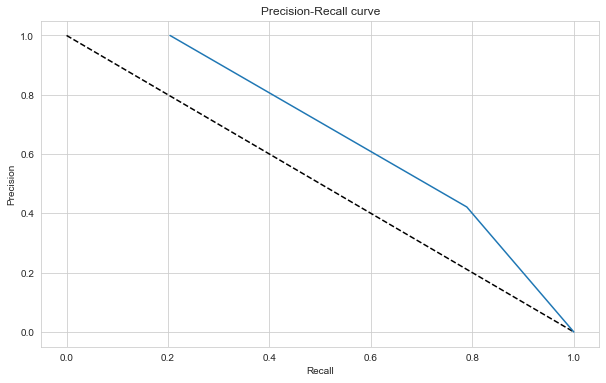

In [162]:
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [163]:
average_precision_score(y_test, y_pred_proba)

0.45061377945673686

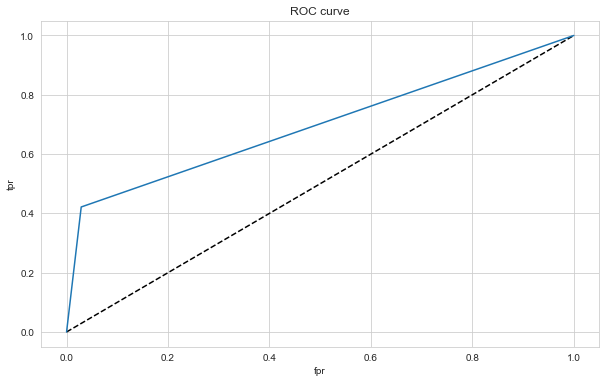

In [165]:
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [166]:
roc_auc_score(y_test, y_pred_proba)

0.6963370775445857

## 7. Final Model and Model Deployment

In [168]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'Nadam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 150, verbose = 1)

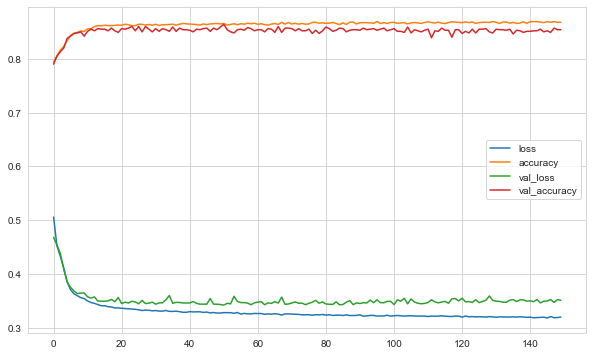

In [170]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [171]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3506785035133362
accuracy :  0.8539999723434448


In [172]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[764  32]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



In [173]:
model.save('assignment1.h5')

## 8. Prediction

In [174]:
from tensorflow.keras.models import load_model

In [175]:
pred_model = load_model('assignment1.h5')

In [181]:
obs = df_final.drop('Exited', axis=1).iloc[0:5, :]
obs

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain,Female,Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0


In [182]:
obs = scaler.transform(obs)
obs

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.516     , 0.31081081, 0.1       , 0.35156138, 0.        ,
        0.        , 1.        , 0.56270874, 0.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.304     , 0.32432432, 0.8       , 0.66975307, 0.66666667,
        1.        , 0.        , 0.56965435, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.698     , 0.28378378, 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [1.        , 0.33783784, 0.2       , 0.52649903, 0.        ,
        1.        , 1.        , 0.39540036, 0.        , 0.        ,
        1.        , 1.        , 0.        ]])

In [183]:
(pred_model.predict(obs) > 0.5).astype('int32')

array([[0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [184]:
df_final['Exited'].iloc[0:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64